<a href="https://colab.research.google.com/github/KBGIBN/L23.KHCL.N01/blob/main/Assignment/3/SoNguyenMoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

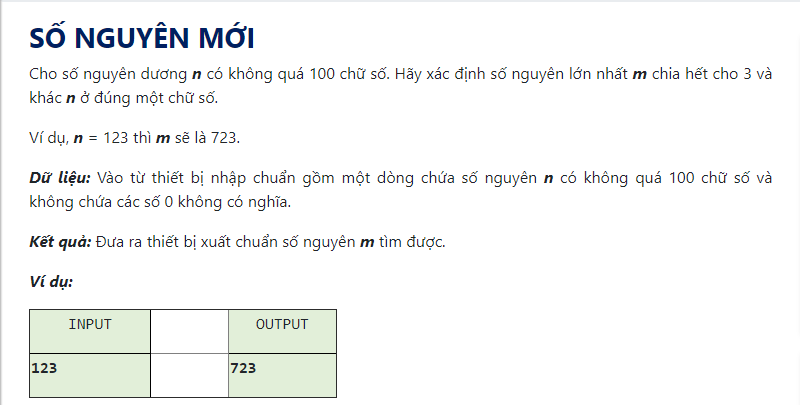

#SỐ NGUYÊN MỚI

#1. Abstraction
Cho số nguyên N, tìm M lớn nhất chia hết cho 3 và khác N 1 chữ số.

#2. Pattern Recognition
* Em xác định đây là:
   * Bài toán áp dụng **dấu hiệu chia hết cho 3**
   * Có **2 ràng buộc** đó là **số lớn nhất có thể** và **khác số đã cho 1 chữ số**.
   * Dấu hiệu chia hết cho 3: tổng các chữ số chia hết cho 3.

#3. Algorithm Design
## 3.1. Ý tưởng ban đầu
* **Bước 1**: Tính xem số đã cho chia hết cho 3 chưa, nếu không chia hết cho 3 thì tính xem cần cộng thêm bao nhiêu để có thể chia hết cho 3. Cụ thể như sau:
   * Tính tổng các chữ số (Tong)
   * Lấy Tong chia lấy phần dư cho 3 (modulo)
   * Lấy Dis = 3 - modulo, và Dis ở đây chính là phần còn thiếu để Tong có thể chia hết cho 3.

   * **Công thức: Dis = 3 - (Tong mod 3)**

* **Bước 2**: Bắt đầu xét các chữ số từ trái sang phải (ví dụ: 123 thì xét 1 -> 2 -> 3) để có thể lấy được số lớn nhất có thể, gọi các chữ số là 1 mảng N, thì xét như sau:
   * Nếu N[i] + Dis <= 9: (Tức là số đang xét hợp lệ để thay đổi)
      * N[i] += Dis
   
   Nếu N[i] đang xét không thỏa điều kiện N[i] + Dis <= 9 thì chuyển sang xét phần tử tiếp theo.
   * Nếu N[i] + 3 <= 9: N[i] += 3;
      * Lặp lại bước trên (Tức là nếu N[i] đã chia hết cho 3 nhưng vẫn chưa là lớn nhất (<=9) thì ta cứ tiếp tục cộng thêm 3, vì Tong vẫn chia hết cho 3)
   * Trả về kết quả là N với phẩn tử N[i] đã thay đổi.

## 3.2. Vấn đề phát sinh
Trong quá trình làm, em nhận ra là có số không thể cộng thêm như *ý tưởng ban đầu*.

Ví dụ:
   * số 789: Tong = 24 chia hết cho 3, nhưng dù cộng 3 ở chữ số nào cũng đều khiến chữ số đó vượt quá 9. Thế nên số 789 vẫn giữ nguyên.
   * Số 889: Tong = 25 không chia hết cho 3, nhưng dù cộng thêm Dis ở chữ số nào cũng làm cho chữ số đó vượt quá 9. Thế nên số 889 vẫn giữ nguyên.
   * Để nhận biết lỗi này thì em xét xem **sum(N)** sau khi đã xử lý số N có bằng với **sum(N)** ban đầu không.

## 3.3. Cải thiện thuật toán
Để khắc phục vấn đề "vượt quá 9", thay vì duyệt từ chữ số đầu rồi cộng với Dis và cộng thêm 3, thì em thêm phần xử lý như sau:
   * Bắt đầu duyệt từ chữ số cuối cùng trở lên. (ví dụ: 123 thì xét 3 -> 2 -> 1) để ta có số lớn nhất có thể, tuy không lớn hơn số đã cho nhưng vẫn thỏa mãn **2 ràng buộc** của bài toán.
   * Xét xem số đã cho chia hết cho 3 không. Nếu dúng thì lấy chữ số >= 3 đầu tiên duyệt được trừ cho 3 rồi thoát vòng lặp duyệt.
   * Nếu số đã cho không chia hết cho 3, thì lấy chữ số >= Tong % 3 đầu tiên duyệt được trừ cho Tong % 3 rồi thoát vòng lặp duyệt.

## 3.4. Độ phức tạp thuật toán: O(n)
   


#4. Programming

In [ ]:
def SoNguyenMoi(N):
    Tong = sum(N)
    Dis = 3 - (Tong % 3)

    for i in range(len(N)):
        if N[i] + Dis <= 9:
            N[i] += Dis
            while N[i] <= 6:
                N[i] += 3
            break

    if sum(N) == Tong: # Kiểm tra xem số đã được thay đổi chưa
        for i in reversed(range(len(N))):
            if Tong % 3 == 0:
                if N[i] >= 3:
                    N[i] -= 3
                    break
            else:
                if N[i] >= Tong % 3:
                  N[i] -= Tong % 3
                  break
   
    return N

def main():
    inp = input()
    N = list(map(int,list(inp)))

    M = SoNguyenMoi(N)
    for i in range(len(M)):
        print(M[i],end='')

if __name__ == "__main__":
    main()

889
888